In [1]:

import os
import json
import glob
import copy
import numpy as np
import pylab as pl
import seaborn as sns
import pandas as pd


from scipy import stats as spstats

from pipeline.python.classifications import bootstrap_fit_tuning_curves as osi
from pipeline.python.classifications import experiment_classes as exc
from pipeline.python.utils import natural_keys, label_figure

/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/test_responsivity.py:10: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    

/home/julianarhee/Repositories/2p-pipeline/pipeline/python/traces/utils.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/h

In [2]:
%matplotlib notebook

# Test Receptive Fields

In [3]:

rootdir = '/n/coxfs01/2p-data'
animalid = 'JC076' #'JC059'
session = '20190420' #'20190227'
fov = 'FOV1_zoom2p0x' #'FOV4_zoom4p0x'
#run = 'combined_rfs_static'
traceid = 'traces001' #'traces001'
segment = False
response_type = 'dff'
#select_rois = False
#rows = 'ypos'


In [6]:
reload(exc)


/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/experiment_classes.py:18: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to u'nbAgg' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/julian

<module 'pipeline.python.classifications.experiment_classes' from '/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/experiment_classes.py'>

In [9]:
S = exc.Session(animalid, session, fov, rootdir=rootdir)

exp = exc.ReceptiveFields(animalid, session, fov, traceid=traceid, rootdir=rootdir)
exp.print_info()



[JC076] 20190420 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
... [JC076|20190420|FOV1_zoom2p0x] creating gratings object
... getting data paths
... combined_gratings_static
... renaming experiment to run name: combined_gratings_static
************* Experiment Object info *************
Name: combined_gratings_static
Experiment type: rfs
Animalid: JC076
Session: 20190420
FOV: FOV1_zoom2p0x
roi-id, trace-id: rois001, traces001
('Data source:', '/n/coxfs01/2p-data/JC076/20190420/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_e280bf_traces001_113086_traces001_caa531_traces001_d04d75_traces001_5735eb/data_arrays/datasets.npz')
No data loaded yet.
**************************************************


In [10]:
exp.name

'combined_gratings_static'

In [8]:
estats = exp.get_stats(response_type=response_type)


... [combined_gratings_static] Loading roi stats and cell list...


IndexError: list index out of range

<IPython.core.display.Javascript object>


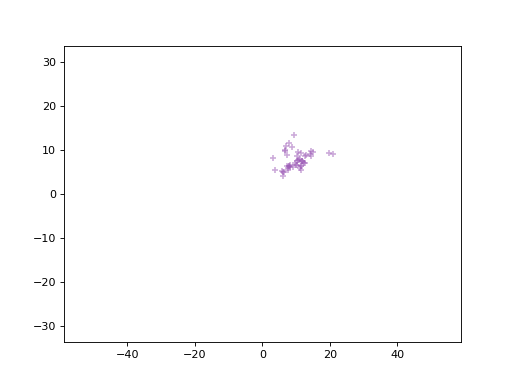

(-33.6615, 33.6615)

In [6]:

fig, ax = pl.subplots()
ax.scatter(estats.fits['sigma_x'], estats.fits['sigma_y'], marker='+', alpha=0.5)
ax.set_xlim([-S.screen['width']/2., S.screen['width']/2.])
ax.set_ylim([-S.screen['height']/2., S.screen['height']/2.])



In [9]:
exp.data.sdf

,aspect,direction,ori,position,sf,size,speed,stimtype,xpos,ypos
config001,1,0,0,"[-50, -25]",0.44,5,10,gratings,-50,-25
config002,1,0,0,"[-50, -20]",0.44,5,10,gratings,-50,-20
config003,1,0,0,"[-50, -15]",0.44,5,10,gratings,-50,-15
config004,1,0,0,"[-50, -10]",0.44,5,10,gratings,-50,-10
config005,1,0,0,"[-50, -5]",0.44,5,10,gratings,-50,-5
config006,1,0,0,"[-50, 0]",0.44,5,10,gratings,-50,0
config007,1,0,0,"[-50, 5]",0.44,5,10,gratings,-50,5
config008,1,0,0,"[-50, 10]",0.44,5,10,gratings,-50,10
config009,1,0,0,"[-50, 15]",0.44,5,10,gratings,-50,15
config010,1,0,0,"[-50, 20]",0.44,5,10,gratings,-50,20
